# Youtube Channel Scraping and Analysis
## Project Overview
This data science project focuses on analyzing YouTube video titles to determine which words or phrases contribute to higher view counts. We'll be first scraping the nesscary data such as  video titles, views, and video durations from youtube then perform data analysis. The goal is to gain insights into content strategy and audience engagement by examining how specific words in titles correlate with the popularity of videos.

In [1]:
# Import tools and libraries
import time 
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup 
import xlsxwriter
import pandas as pd 
import re
from tqdm import tqdm 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taowa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taowa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Web Scraping and Data Collection

In [2]:
# Define the YouTube channel URL
urls=['https://www.youtube.com/@ryan/videos']

# Initialize empty lists to store extracted data
t=[] 
v=[]
d=[]


# Set up Chrome Driver and parse the page source using BeautifulSoup
driver=webdriver.Chrome()
driver.get(urls[0])
content=driver.page_source.encode('utf-8').strip()
soup=BeautifulSoup(content, 'lxml')

# Extract video titles
titles=soup.findAll('yt-formatted-string', id='video-title')
for title in titles:
    t.append(title.text)

# Extract video views
views=soup.findAll('span', class_='inline-metadata-item style-scope ytd-video-meta-block')

for view in views:
    v.append(view.text)
del v[1::2]

# Extraxt video durations
durations=soup.findAll('span', class_='style-scope ytd-thumbnail-overlay-time-status-renderer')
for duration in durations:
    d.append(duration.text)
del d[1::2]


In [3]:
print(t)

['I Actually Bought 100 TikTok Ads', 'I Tried Every Airbnb Category', 'I Tested 1-Star Airlines', 'I Tried Every Seat on the Most Expensive Train', 'I Tested the Weirdest Amazon Items', "I Stayed in MrBeast's Nuclear Bunker", 'I Stayed in Secret Hotels', 'I crossed America with $0.01', 'I Tried Every Seat on the Most Expensive Airline', 'I Stayed in Every Hotel at Disney World', 'I Tested 1-Star Hotels (again)', 'I Tried Airport Sleep Pods', 'I Tested 1-Star Drive Thrus', 'I Stayed in “OMG!” Airbnbs', 'My last video', 'I Survived 50 Hours in Apple Vision Pro', 'I Tried Every Drive Thrus Most Expensive Item', 'I Tested 1-Star Camping', 'I Tested 1-Star Theme Parks', 'I Took a Road Trip in Luxury Cars', 'I Stayed in Luxury Tiny Homes', 'I Invited 100 Billionaires To My Birthday', 'I Played 50 Years of Video Games', 'I Tested 1-Star Hotels', 'I Fixed 100 Famous Logos', 'I Bought Banned Kid Toys', 'I Tested 1-Star Restaurants', 'I traveled 3,624 miles with €0.01', 'I Made It Back To Americ

In [4]:
print(v)

['3.8M views', '9.6M views', '12M views', '14M views', '9.6M views', '9.8M views', '13M views', '11M views', '34M views', '19M views', '26M views', '21M views', '22M views', '24M views', '9M views', '23M views', '18M views', '21M views', '27M views', '9.2M views', '22M views', '12M views', '6.5M views', '27M views', '9.4M views', '15M views', '22M views', '29M views', '6.1M views', '6.2M views']


In [5]:
print(d)

['\n    16:55\n  ', '\n    27:15\n  ', '\n    29:36\n  ', '\n    26:57\n  ', '\n    22:18\n  ', '\n    18:20\n  ', '\n    26:13\n  ', '\n    4:42:32\n  ', '\n    25:23\n  ', '\n    41:54\n  ', '\n    29:49\n  ', '\n    21:38\n  ', '\n    29:48\n  ', '\n    26:13\n  ', '\n    5:50\n  ', '\n    22:45\n  ', '\n    20:19\n  ', '\n    22:44\n  ', '\n    21:13\n  ', '\n    17:24\n  ', '\n    19:20\n  ', '\n    13:36\n  ', '\n    10:12\n  ', '\n    21:17\n  ', '\n    14:50\n  ', '\n    14:07\n  ', '\n    21:20\n  ', '\n    1:06:44\n  ', '\n    11:21\n  ', '\n    13:03\n  ']


In [6]:
# Remove extra space and newline characters
d=[re.sub(r'\s+', '', duration) for duration in d]

In [7]:
print(d)

['16:55', '27:15', '29:36', '26:57', '22:18', '18:20', '26:13', '4:42:32', '25:23', '41:54', '29:49', '21:38', '29:48', '26:13', '5:50', '22:45', '20:19', '22:44', '21:13', '17:24', '19:20', '13:36', '10:12', '21:17', '14:50', '14:07', '21:20', '1:06:44', '11:21', '13:03']


In [8]:
# Create a new Excel workbook and extract elements in previous lists to the workbook
workbook = xlsxwriter.Workbook('file.xlsx') 
worksheet = workbook.add_worksheet() 
  
worksheet.write(0, 0, "Title") 
worksheet.write(0, 1, "Views") 
worksheet.write(0, 2, "Duration") 
  
row = 1
for title, view, dura in zip(t,v,d): 
    worksheet.write(row, 0, title) 
    worksheet.write(row, 1, view) 
    worksheet.write(row, 2, dura) 
    row += 1
  
workbook.close()

In [9]:
# Result
data = pd.read_excel('file.xlsx') 
data

,Title,Views,Duration
0,I Actually Bought 100 TikTok Ads,3.8M views,16:55
1,I Tried Every Airbnb Category,9.6M views,27:15
2,I Tested 1-Star Airlines,12M views,29:36
3,I Tried Every Seat on the Most Expensive Train,14M views,26:57
4,I Tested the Weirdest Amazon Items,9.6M views,22:18
5,I Stayed in MrBeast's Nuclear Bunker,9.8M views,18:20
6,I Stayed in Secret Hotels,13M views,26:13
7,I crossed America with $0.01,11M views,4:42:32
8,I Tried Every Seat on the Most Expensive Airline,34M views,25:23
9,I Stayed in Every Hotel at Disney World,19M views,41:54


## Data Preprocessing

In [10]:
# Convert Views into numeric variables 
data['Views'] = data['Views'].str.replace(" views","") 
  
new = [] 
  
for i in data['Views']: 
    if(i.endswith('M')): 
        i = i.replace('M','') 
        new.append(float(i) * 1000000) 
    else : 
        new.append(i) 
  
data['Views'] = new

In [11]:
# Convert Durations into numeric variables (seconds)
new2 = [] 
  
for i in data['Duration']: 
    if(i=='SHORTS' or len(i.split(':'))==1): 
        new2.append(i) 
    elif(len(i.split(':'))==2): 
        i = i.split(':') 
        tim = int(i[0])*60 + int(i[1]) 
        new2.append(tim) 
    elif(len(i.split(':'))==3): 
        i = i.split(':') 
        tim = int(i[0])*3600 + int(i[1])*60 + int(i[2]) 
        new2.append(tim) 
          
data['Duration'] = new2

In [12]:
# Make all text in title lowercase
def preprocess_text(text_data): 
    preprocessed_text = [] 
      
    for sentence in tqdm(text_data): 
        sentence = re.sub(r'[^\w\s]', '', sentence) 
        preprocessed_text.append(' '.join(token.lower() 
                                  for token in str(sentence).split() 
                                  if token not in stopwords.words('english'))) 
  
    return preprocessed_text 
    
preprocessed_review = preprocess_text(data['Title'].values) 
data['Title'] = preprocessed_review

100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 1217.14it/s]


In [13]:
data.head()

,Title,Views,Duration
0,i actually bought 100 tiktok ads,3800000.0,1015
1,i tried every airbnb category,9600000.0,1635
2,i tested 1star airlines,12000000.0,1776
3,i tried every seat most expensive train,14000000.0,1617
4,i tested weirdest amazon items,9600000.0,1338


## Data Exploration and Visualization

In [14]:
data.describe()

,Views,Duration
count,3.000000e+01,30.000000
mean,1.637333e+07,1881.866667
std,8.047528e+06,2921.897125
min,3.800000e+06,350.000000
25%,9.600000e+06,1022.250000
50%,1.450000e+07,1289.000000
75%,2.200000e+07,1606.000000
max,3.400000e+07,16952.000000


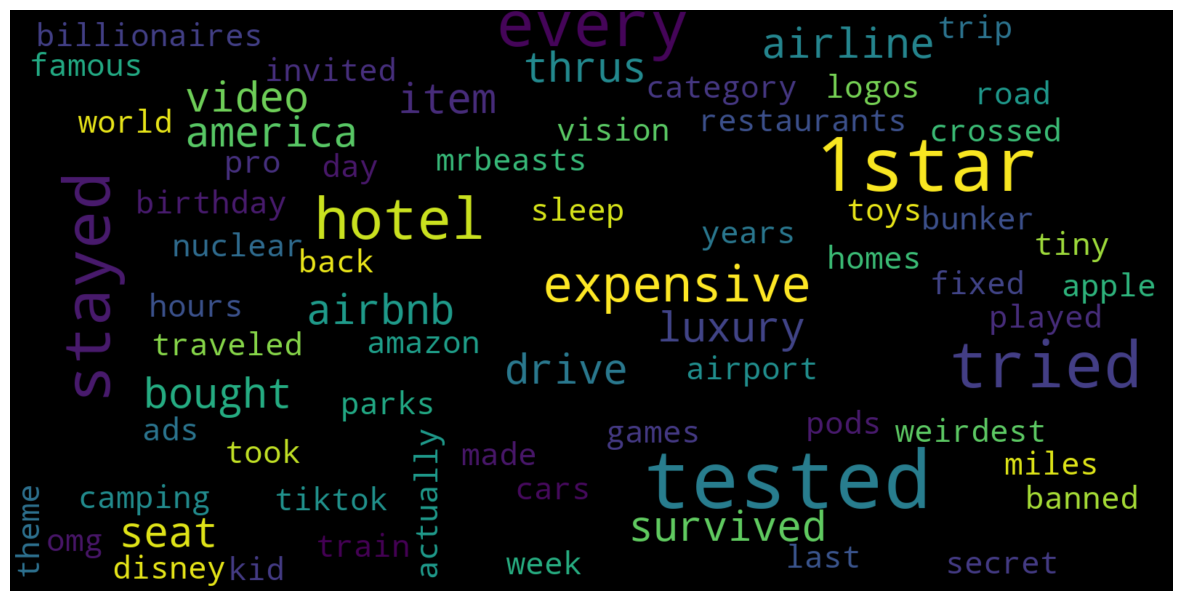

In [15]:
# Create word cloud to display the most used word in titles 
consolidated = ' '.join(word for word in data['Title'].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, random_state=21, 
                      max_font_size=110, collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

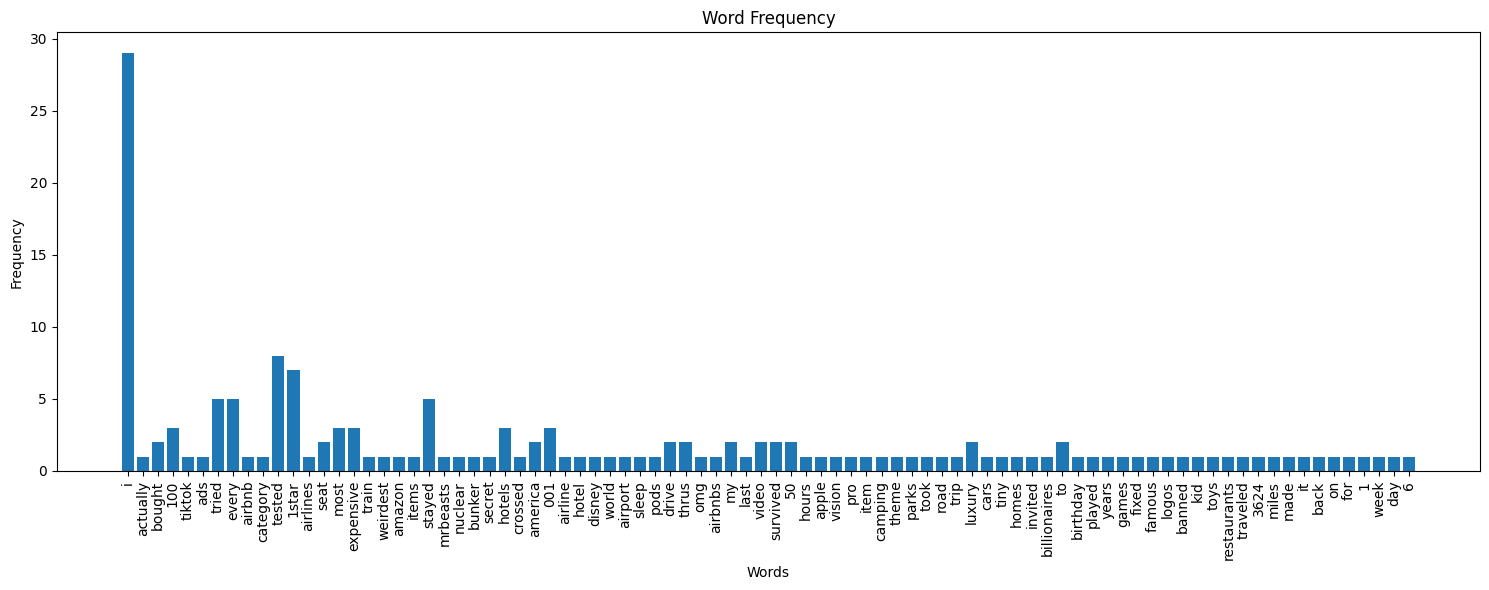

In [16]:
# Create bar plot for word frequency in the title 
words = consolidated.split()

word_counts = Counter(words)

labels, values = zip(*word_counts.items())

plt.figure(figsize=(15, 6))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.title('Word Frequency')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.tight_layout()

plt.show()

In [17]:
# Identify words that are associated with the highest average views
def preprocess_title(title):
    return re.sub(r'[^\w\s]', '', title.lower())

data['Title_clean'] = data['Title'].apply(preprocess_title)

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Title_clean'])

word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

word_counts['Views'] = data['Views'].values

word_mean_views = word_counts.drop(columns='Views').multiply(word_counts['Views'], axis=0).sum() / word_counts.sum()

top_words_by_views = word_mean_views.sort_values(ascending=False).head(10)

print(top_words_by_views)

airline     34000000.0
3624        29000000.0
miles       29000000.0
traveled    29000000.0
parks       27000000.0
theme       27000000.0
seat        24000000.0
airbnbs     24000000.0
omg         24000000.0
vision      23000000.0
dtype: float64


These words seem to be associated with high-view videos, with keywords related to travel experiences ("airline," "miles," "traveled") and specific topics (e.g., "theme parks," "airbnbs," "apple") generating the most engagement

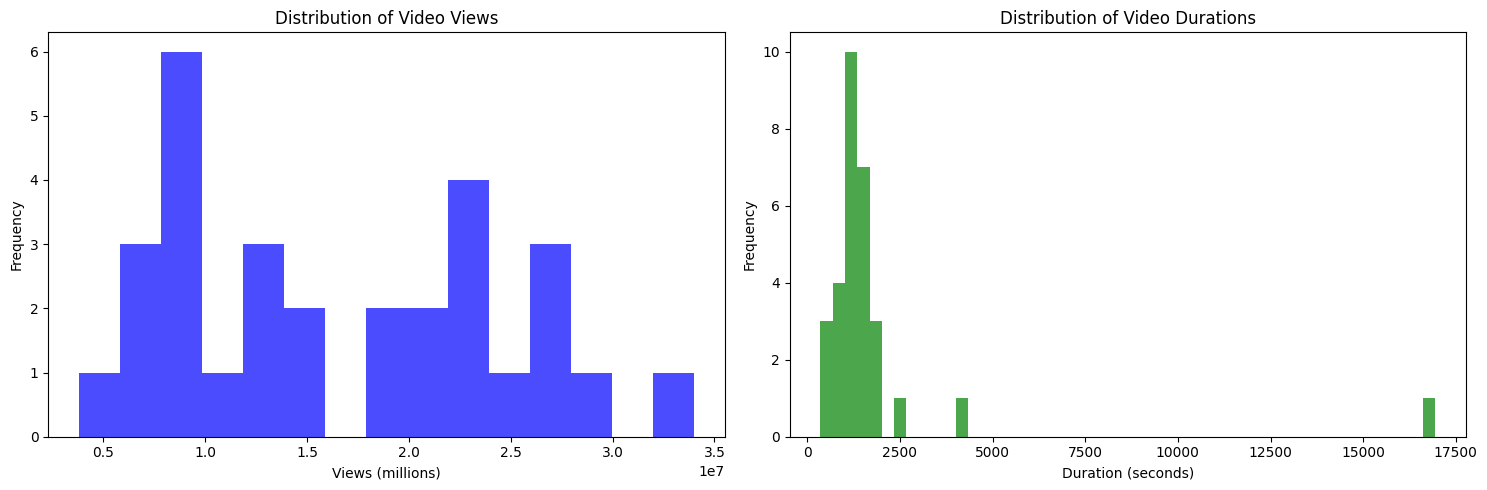

In [20]:
# Create bar plots to check video views and durations frequency 
plt.figure(figsize=(15, 5))

# Views distribution
plt.subplot(1, 2, 1)
plt.hist(data['Views'], bins=15, color='blue', alpha=0.7)
plt.title('Distribution of Video Views')
plt.xlabel('Views (millions)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['Duration'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

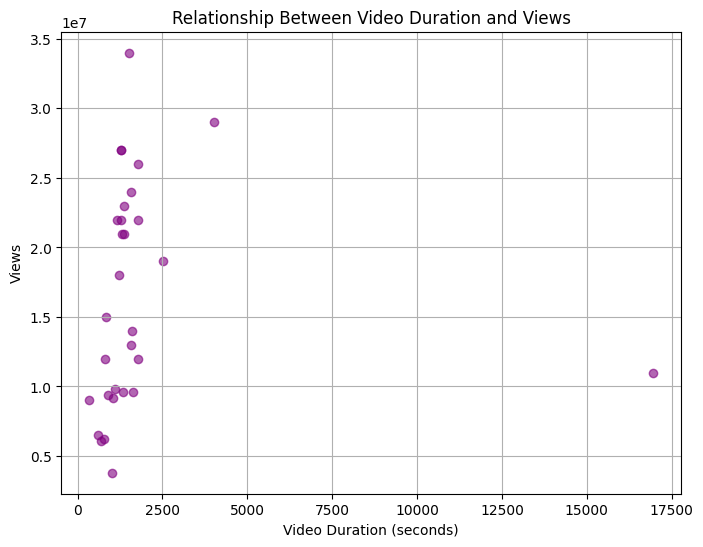

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Duration'], data['Views'], color='purple', alpha=0.6)
plt.title('Relationship Between Video Duration and Views')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Views')
plt.grid(True)
plt.show()

When examining the relationship between video duration and views, there was no clear linear correlation. This suggests that video length alone is not a significant factor in determining the popularity of a video.

***Key Observation:*** Mid-length videos (17 to 27 minutes) tend to perform well, while extremely long videos (over an hour) can still achieve millions of views if the content is engaging enough.

## Conclusion

This project identified critical factors that influence video viewership by analyzing video titles, durations, and views. Through comprehensive data scraping, preprocessing, and exploratory analysis, the project revealed key insights into the relationship between title keywords and viewership trends. The findings demonstrated that certain keywords and optimal video durations significantly contribute to higher engagement, providing a data-driven approach for optimizing content strategy.

## Furture Work

1. ***Engagement Metrics Integration:*** Incorporating additional engagement data, such as likes, comments, and shares, would provide a more holistic view of video performance and help refine the relationship between viewer interaction and content strategy.

2. ***Sentiment Analysis on Comments:*** Performing sentiment analysis on user comments can offer insights into viewer reactions and feedback, helping content creators understand audience sentiment and adjust content accordingly.

3. ***Time-Series Analysis:*** Analyzing video performance trends over time could reveal patterns in viewership growth, audience retention, and seasonal content preferences, enabling more dynamic content planning.